In [1]:
%config Completer.use_jedi = False

import sys
sys.path.append('../../ACORE-LFI/')
sys.path.append('../../ACORE-LFI/acore/')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from toy_data import generate_data, plot_data, plot_vectors
from models.muon_features import MuonFeatures
from acore_ada import ACORE

# Construct confidence intervals for $\theta$ with ACORE

In [3]:
data = generate_data(sample_size=10000, test_fraction=0.05, slope=10, precision=3, seed=77, split=False)

In [4]:
model = MuonFeatures(data=data, 
                     t0_grid_granularity=100, 
                     true_param_low=0, 
                     true_param_high=1, 
                     observed_dims=1, 
                     observed_sample_fraction=0.05,
                     reference_g='marginal',
                     param_column=0, 
                     debug=True)

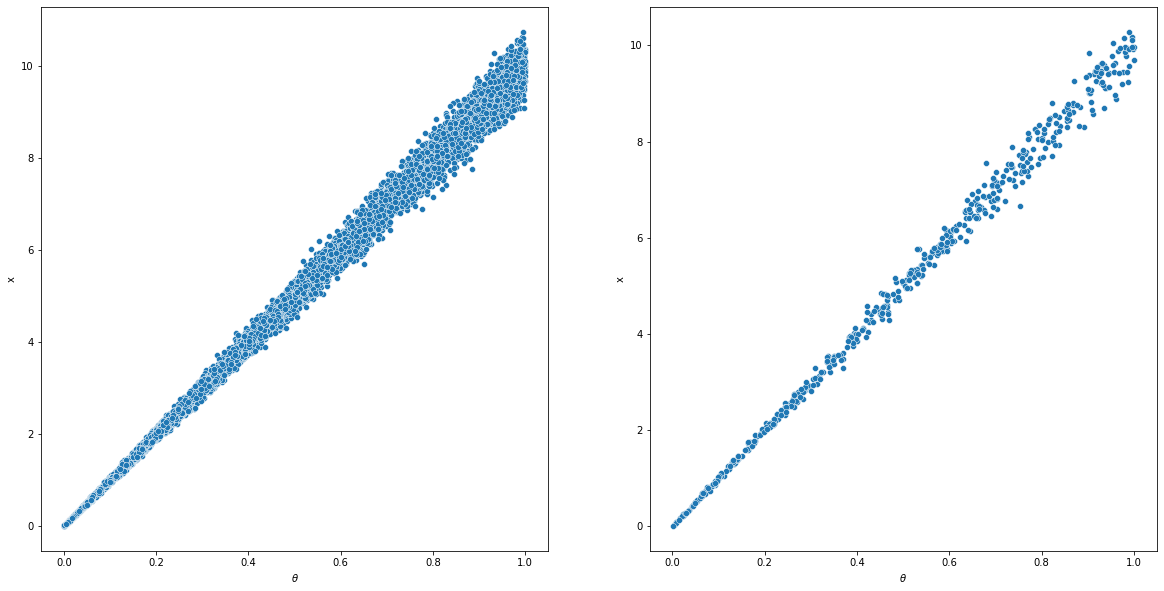

In [5]:
plot_data(train_set=model.train_set, test_set=np.hstack((model.obs_param.reshape(-1, 1),model.obs_x)))

#### Show data for label = 1 and label = 0 (G reference)

In [6]:
#try_sample = model.generate_sample(sample_size=10000)

In [7]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
#ax[0].scatter(x=try_sample[try_sample[:,0] == 1,1], y=try_sample[try_sample[:,0] == 1,2])
#ax[0].set_xlabel(r"$\theta$")
#ax[0].set_ylabel(r"$X$")
#ax[0].set_title("Simulator")
#ax[1].scatter(x=try_sample[try_sample[:,0] == 0,1], y=try_sample[try_sample[:,0] == 0,2])
#ax[1].set_title("Reference (marginal)")
#ax[1].set_xlabel(r"$\theta$")
#ax[1].set_ylabel(r"$X$")
#plt.show()

In [8]:
acore = ACORE(model=model, 
              b=1000, 
              b_prime=1000, 
              alpha=0.05, 
              classifier_or='MLP', 
              classifier_qr='xgb_d3_n100', 
              sample_size_obs=1, 
              debug=True)

In [9]:
acore.model.train_set_left.shape, acore.model.train_set.shape, acore.model.obs_x.shape, acore.model.obs_param.shape

((9500, 2), (9500, 2), (500, 1), (500,))

In [10]:
acore.confidence_band()

----- MLP Trained


Calculate Odds: 100%|██████████| 50000/50000 [01:36<00:00, 516.00it/s]

----- Training Quantile Regression Algorithm


----- Creating Confidence Band


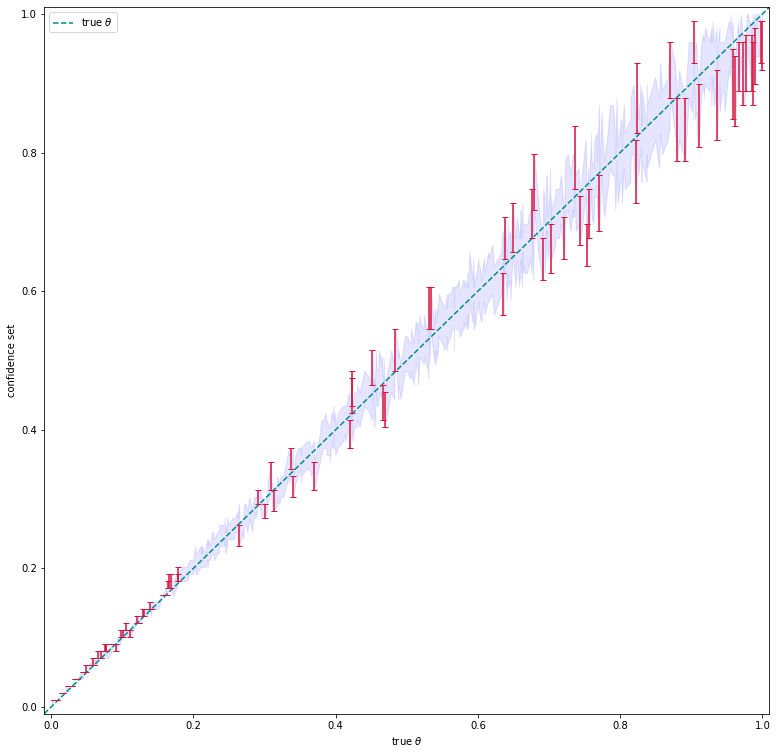

In [11]:
df = acore.plot_confidence_band(return_df=True)

In [15]:
df.loc[df.covered == False, :].describe()

,obs_theta,lower,upper,error_bar_center,lower_err,upper_err
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.375877,0.353845,0.388580,0.371212,0.017368,0.017368
std,0.347022,0.316486,0.349982,0.333204,0.017330,0.017330
min,0.003717,0.010101,0.010101,0.010101,0.000000,0.000000
25%,0.076572,0.080808,0.090909,0.085859,0.000000,0.000000
50%,0.178503,0.181818,0.196970,0.189394,0.010101,0.010101
75%,0.699605,0.654040,0.722222,0.688131,0.030303,0.030303
max,0.999295,0.929293,0.989899,0.959596,0.050505,0.050505
